In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
from os.path import isfile, join
from matplotlib import cm
from scipy import signal

In [3]:
def parce_data(filepath: str) -> pd.DataFrame:
    file = open(filepath)
    time_step_index, time_step_time = 0, 0
    ch1_step_index, ch2_step_index = 0, 0
    ch1_step_voltage, ch2_step_voltage = 0, 0
    time, voltage = [], []
    for ind, line in enumerate(file):
        if ind == 2:
            time_step_index, time_step_time = line.split(" = ")
            time_step_index = int(time_step_index)
            time_step_time = float(time_step_time[:-3])
        if ind == 5:
            _, right_part = line.split("  ")
            ch1_step_index, ch1_step_voltage = right_part.split(" = ")
            ch1_step_index = int(ch1_step_index)
            ch1_step_voltage = float(ch1_step_voltage[:-2])
        if ind == 6:
            _, right_part = line.split("  ")
            ch2_step_index, ch2_step_voltage = right_part.split(" = ")
        if ind == 7:
            _, gnd_level_ch1, gnd_level_ch2 = line.split("\t")
            gnd_level_ch1 = int(gnd_level_ch1)
        if ind > 15:
            try:
                N, ch1, ch2 = map(float, line[:-2].split('\t'))
            except:
                N, _, ch1ch2 = line.split(' ')
                N = int(N)
                ch1, ch2 = map(float, ch1ch2.split('\t'))
            voltage.append(ch1 * ch1_step_voltage / ch1_step_index)
            time.append(N * time_step_time / time_step_index)
    voltage = np.array(voltage)
    voltage -= np.mean(voltage)
    res = {"time": time, "voltage": voltage}
    return pd.DataFrame(res)
        

In [4]:
d1 = parce_data("data/3_090A.txt")
d1

,time,voltage
0,0.0096,-0.017719
1,0.0112,-0.003656
2,0.0128,-0.008344
3,0.0144,-0.017719
4,0.0160,-0.027094
...,...,...
4085,6.5456,-0.045844
4086,6.5472,-0.008344
4087,6.5488,0.029156
4088,6.5504,0.052594


Text(0, 0.5, 'Напряжение [В]')

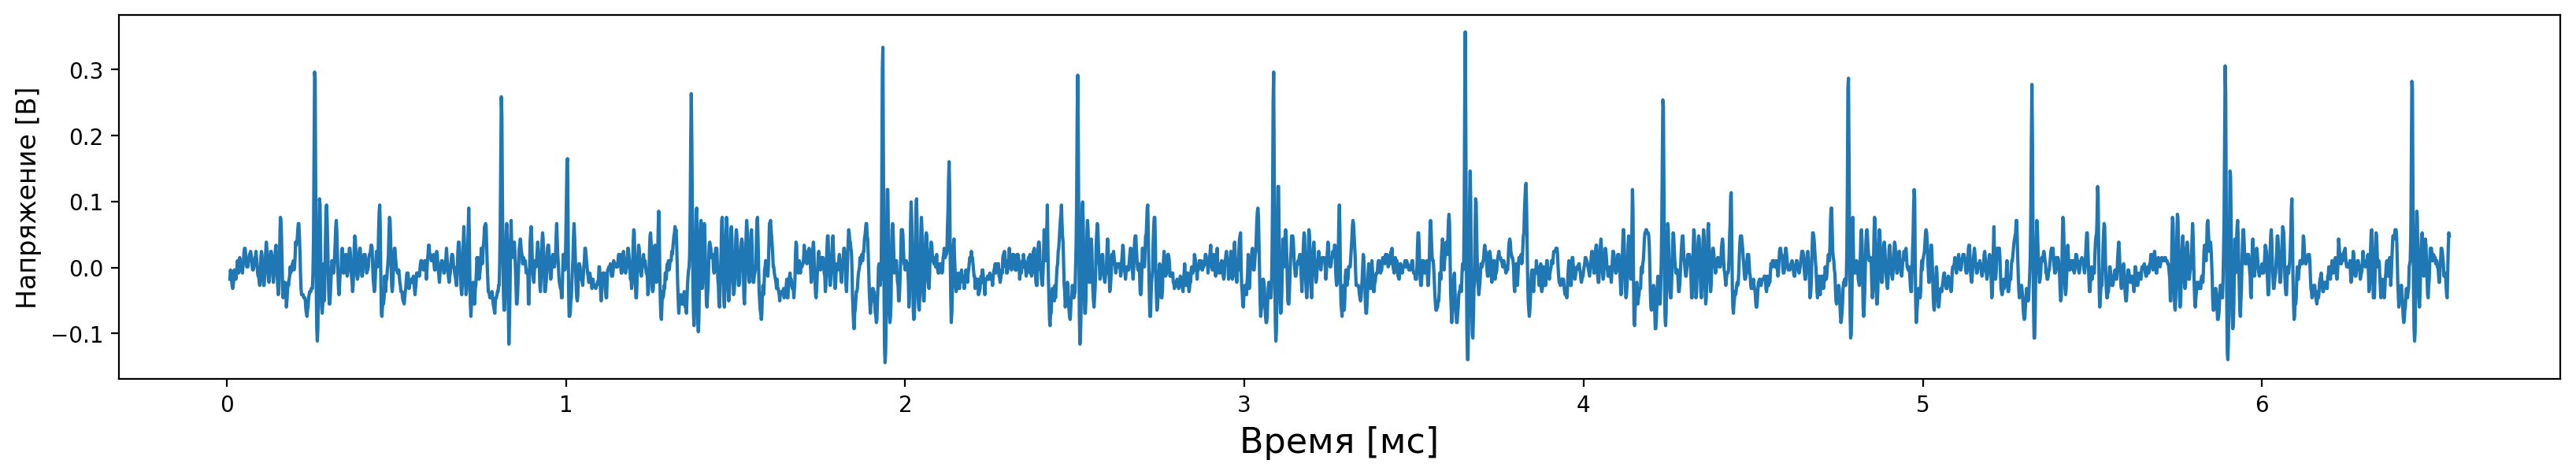

In [5]:
plt.figure(figsize = (20, 3), dpi = 200)
plt.plot(d1.time, d1.voltage)
plt.xlabel("Время [мс]", fontsize = 16)
plt.ylabel("Напряжение [В]", fontsize = 12)

In [6]:
data_path = r'data'
data_file_names = [f for f in listdir(data_path) if isfile(join(data_path, f))]


### Эксперимент 1

In [7]:
experiment_1_file_names = [f for f in data_file_names if len(f) == 10]
current = np.array([float(f[:-5].replace('_', '.')) for f in experiment_1_file_names]) #сила тока накачки в амперах
print(len(experiment_1_file_names))

12


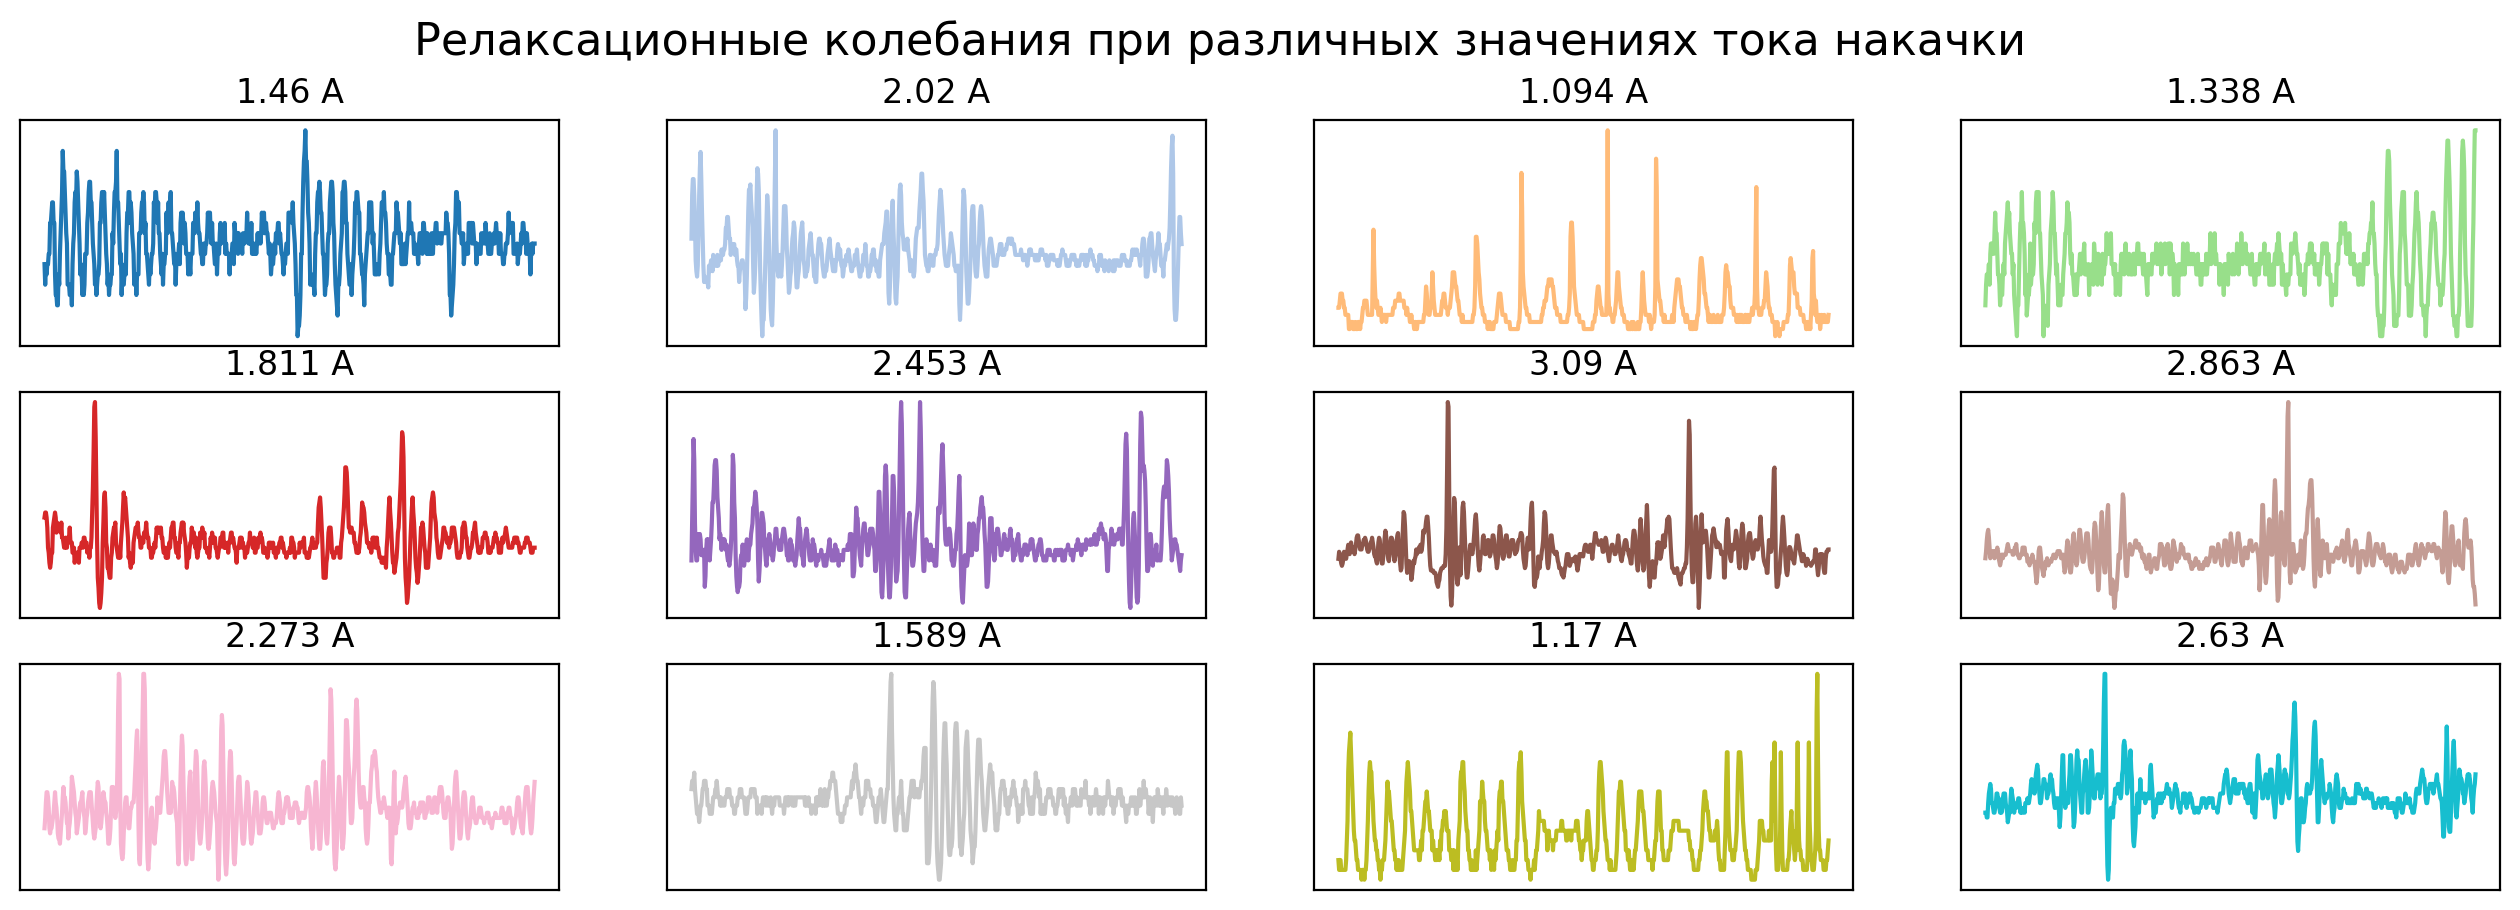

In [8]:
fig, ax = plt.subplots(3, 4, figsize = (16, 5), dpi = 200)
plotable_signal_duration = 700
for ind, (name, I) in enumerate(zip(experiment_1_file_names, current)):
    plotable = ax[ind  // 4][ind % 4]
    data = parce_data(f"{data_path}/{name}")
    plotable.plot(data.time[:plotable_signal_duration], 
                  data.voltage[:plotable_signal_duration],
                  color = cm.tab20(ind / 12))
    plotable.set_xticks([])
    plotable.set_yticks([])
    plotable.set_title(f"{I} А")

fig.suptitle("Релаксационные колебания при различных значениях тока накачки", fontsize = 16);